## Machine learning project

In [584]:
# import libraries
#!pip install --upgrade category_encoders
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import fuzzywuzzy
from fuzzywuzzy import process
import chardet

import collections
from collections import Counter



In [585]:
# import pandas as pd
# import numpy as np

# your_list = np.array(['Sc.B','S.B.','Dual Degree','BEng. 2master','M.Phil.','Masters degree'])
# names = np.array([f"person_{ii}" for ii in range(len(your_list))])

# df = pd.DataFrame({"names": names, "degree_title": your_list})
# print(df)

In [586]:
new_classifications = [] # Make an empty list so we can keep track of what we classify the new degree as.

for degree in df["Last_degree"]:
    if "bachelor" in degree.lower(): # lower() as we don't care if it's "Bachelor" or "bachelor"
        new_classifications.append("bachelor") # Anything here is good enough to be called "bachelor"
    elif "master" in degree.lower():
        new_classifications.append("master")
    elif "doctorate" in degree.lower():
        new_classification.append("phd")
    else:
        new_classifications.append("unclassified")
        print(f"no classification found for {degree}")

no classification found for none
no classification found for specialization in full stack development with react
no classification found for taqadam accelerator programme
no classification found for ms(cs)
no classification found for acca
no classification found for mphil
no classification found for deep learning nanodegree
no classification found for mscs
no classification found for intermediate
no classification found for high school
no classification found for doctor of philosophy (ph.d.)
no classification found for phd scholar
no classification found for b.s. computer science, minor: business and management science
no classification found for ms statistics and computing
no classification found for fsc
no classification found for ms(se)
no classification found for ms(data sciene)
no classification found for doctor of philosophy (phd)
no classification found for mba
no classification found for mba
no classification found for matriculation
no classification found for doctor of philoso

In [587]:
new_classifications = [] 

for degree in df["Last_degree"]:
    if "bachelor" in degree.lower() or degree.lower().startswith("b") or "b." in degree.lower():
        new_classifications.append("bachelor")
    elif "B" in degree and degree.isupper(): # Also require the whole title to be uppercase 
        new_classifications.append("bachelor")
    elif "master" in degree.lower() or degree.lower().startswith("m") or "m." in degree.lower():
        new_classifications.append("master")
    elif "doctorate" in degree.lower():
        new_classification.append("phd")
    elif degree in ["Diplom", "Fellowship", "CPA", "Specialisation", "Graduate Diploma"]:
        new_classifications.append("some_classification_that_you_write_for_these_edge_cases")
    else:
        new_classifications.append("unclassified")
        print(f"no classification found for {degree}")

no classification found for none
no classification found for specialization in full stack development with react
no classification found for taqadam accelerator programme
no classification found for acca
no classification found for deep learning nanodegree
no classification found for intermediate
no classification found for high school
no classification found for doctor of philosophy (ph.d.)
no classification found for phd scholar
no classification found for fsc
no classification found for doctor of philosophy (phd)
no classification found for doctor of philosophy (ph.d.)
no classification found for cosi
no classification found for data science and decision making
no classification found for react nano degree
no classification found for taqadam accelerator program
no classification found for entrepreneurship
no classification found for executive mba
no classification found for react nanodegree
no classification found for software project management(spm)
no classification found for doct

In [588]:
df["new_classification"] = new_classifications
df["new_classification"]

0           bachelor
1           bachelor
2           bachelor
3             master
4           bachelor
5           bachelor
6             master
7             master
8           bachelor
9       unclassified
10      unclassified
11          bachelor
12          bachelor
13          bachelor
14            master
15          bachelor
16          bachelor
17          bachelor
18          bachelor
19          bachelor
20          bachelor
21            master
22          bachelor
23          bachelor
24          bachelor
25          bachelor
26          bachelor
27          bachelor
28          bachelor
29          bachelor
30          bachelor
31          bachelor
32          bachelor
33          bachelor
34          bachelor
35          bachelor
36          bachelor
37          bachelor
38          bachelor
39          bachelor
40          bachelor
41          bachelor
42          bachelor
43          bachelor
44          bachelor
45          bachelor
46          bachelor
47          b

In [589]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#pd.set_option('display.max_rows', 30)

In [590]:
#df = pd.read_csv('./Full data after cleaning.csv')
#df = pd.read_csv('./Full_data_after_cleaning.csv', error_bad_lines=False)
df = pd.read_csv('./final_preprocess_data.csv')
df.drop(['Unnamed: 0','Unnamed: 0.1'], axis = 1, inplace = True)

In [591]:
df

,Name,Current_Company,Current_Job,Total_year,job_location,Last_degree,Graduation_start_year,Graduation_end_year,Last_University,ProfileIDS,skills
0,abrar javed,upwork,freelancer,sep 2020 – present,pakistan,bachelor of electrical engineering,2015,2020,fast nuces,/in/abrar-javed-49854b14b/,management||microsoft excel||customer service|...
1,mahrukh fatima,devbunch private limited,project coordinator,oct 2021 – present,"lahore, pakistan",bachelor of business administration,2014,2018,fast nuces,/in/mahrukh-fatima-60b863106/,microsoft office||customer service||microsoft ...
2,neha nadeem,daraz,data analyst,dec 2020 – present,"los angeles, california, united states",bachelor of computer science,2016,2020,fast nuces,/in/nehanadeem/,business intelligence (bi)||data analysis||dat...
3,abdul rafeh,no joke marketing,corporate marketing manager,oct 2021 – present,united states,masters degree,2017,2018,fast nuces,/in/rafeh11/,microsoft office||microsoft excel||powerpoint|...
4,areeba ayyaz,keeptruckin,software engineer,nov 2020 – present,"lahore, punjab, pakistan",bachelor of computer science,2016,2020,fast nuces,/in/areeba-ayyaz-6948071a3/,java||ruby on rails||problem solving||android ...
5,ram chand,upwork,data science and machine learning engineer,jan 2020 – present,pakistan,bachelor of computer science,2016,2020,fast nuces,/in/ram-chand-57ab41133/,project management||artificial intelligence||m...
6,farooq sarfraz,emeritus,subject matter expert,sep 2021 – present,united states,masters of data analytics,2018,2020,deakin university,/in/farooq-sarfraz-457a591a8/,data analytics||php frameworks||analytics||pro...
7,areij javed,ibm,data scientist,apr 2019 – present,"islamabad, pakistan",masters degree,2017,2018,the australian national university,/in/areij-javed-820795b4/,computer science||artificial intelligence||pro...
8,muhammad ashir,nextbridge ltd.,software engineer,aug 2020 – present,"lahore, punjab, pakistan",bachelors degree,2016,2020,fast nuces,/in/muhammadashirali4/,software development||android development||flu...
9,none,none,none,none,none,none,none,none,none,None,none


In [592]:
# get all the unique values in the 'Location' column
job_location = df['job_location'].unique()

# sort them alphabetically and then take a closer look
#Last_degree.sort()
job_location
len(job_location)

209

In [593]:
# helpful modules
#!pip install fuzzywuzzy
import fuzzywuzzy
from fuzzywuzzy import process
import chardet

# set seed for reproducibility
#np.random.seed(0)

In [594]:
# get the top 10 closest matches to "d.i khan"
matches = fuzzywuzzy.process.extract("islamabad", job_location, limit=100, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

# take a look at them
matches

[('islamabad', 100),
 ('nuces, islamabad', 75),
 ('faisalabad', 74),
 ('islamabad, pakistan', 67),
 ('isla\x81ma\x81ba\x81d, pakistan', 67),
 ('islamabad,pakistan', 67),
 ('islamabad pakistan', 67),
 ('faisalbad', 67),
 ('islamabd, pakistan', 62),
 ('islamabd pakistan', 62),
 ('evacuee trust islamabad', 56),
 ('abbottabad', 53),
 ('regional office islamabad', 53),
 ('parliament house, islamabad', 51),
 ('faisalabad, pakistan', 50),
 ('h-9 cddt building islamabad', 50),
 ('islamabad, isla\x81ma\x81ba\x81d, pakistan', 49),
 ('islamabad, islamabad, pakistan', 49),
 ('saudi arabia', 48),
 ('allama iqbal town', 46),
 ('pakistan secretariat,  islamabad', 46),
 ('swabi pakistan', 43),
 ('punjab, pakistan', 42),
 ('rawalpindi, punjab, pakistan', 40),
 ('faisalabad, punjab, pakistan', 40),
 ('poland', 40),
 ('canada', 40),
 ('national incubation center, islamabad', 40),
 ('riyadh', 40),
 ('harbin, china', 38),
 ('pakistan, pakistan', 38),
 ('jeddah, saudi arabia', 36),
 ('islamabad gpo, federal

In [492]:
# look at the first ten thousand bytes to guess the character encoding
with open("./final_preprocess_data.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100))

# check what the character encoding might be
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [493]:
pd.set_option('display.max_rows', df.shape[0]+1)
print(df)

                                                  Name  \
0                                          abrar javed   
1                                       mahrukh fatima   
2                                          neha nadeem   
3                                          abdul rafeh   
4                                         areeba ayyaz   
5                                            ram chand   
6                                       farooq sarfraz   
7                                          areij javed   
8                                       muhammad ashir   
9                                                 none   
10                                        wajahat shaw   
11                                         usama azhar   
12                                            fizza j.   
13                                   syed arsalan adil   
14                                    sabeeh ur rehman   
15                                         maria ahmed   
16            

In [595]:
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 44):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=100, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    
    
# use the function we just wrote to replace close matches to "d.i khan" with "d.i khan"
replace_matches_in_column(df=df, column='job_location', string_to_match ="karachi")

In [596]:
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 43):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=100, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    
    
# use the function we just wrote to replace close matches to "d.i khan" with "d.i khan"
replace_matches_in_column(df=df, column='job_location', string_to_match ="lahore")
    

In [597]:
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 44):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=100, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    
    
# use the function we just wrote to replace close matches to "d.i khan" with "d.i khan"
replace_matches_in_column(df=df, column='job_location', string_to_match ="islamabad")
    

In [598]:
# get all the unique values in the 'Location' column
job_location = df['job_location'].unique()

# sort them alphabetically and then take a closer look
#Last_degree.sort()
len(job_location)
#job_location

170

In [599]:
df.isnull().sum()

Name                     0
Current_Company          0
Current_Job              0
Total_year               0
job_location             0
Last_degree              0
Graduation_start_year    0
Graduation_end_year      0
Last_University          0
ProfileIDS               0
skills                   0
dtype: int64

In [600]:
#cleaning

In [601]:
X = df.drop(['job_location'], axis=1)

y = df['job_location']   # target colmun

In [602]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [603]:
X_train.shape, X_test.shape

((1429, 10), (704, 10))

In [604]:
X_train.dtypes

Name                     object
Current_Company          object
Current_Job              object
Total_year               object
Last_degree              object
Graduation_start_year    object
Graduation_end_year      object
Last_University          object
ProfileIDS               object
skills                   object
dtype: object

In [605]:
X_train.head(60)

,Name,Current_Company,Current_Job,Total_year,Last_degree,Graduation_start_year,Graduation_end_year,Last_University,ProfileIDS,skills
1799,umair dawood,national university of computer and emerging s...,software engineer,may 2020 – present,bachelor's degree,2019,2023,fast nuces,/in/umair-dawood/,c++||c#||database administration||quality assu...
1357,abdul jabbar,innvotive saudi,software engineer,mar 2017 – present,ms (spm),2015,2017,fast nuces,/in/abduljabbar1/,asp.net||vb.net||ado.net||web services||oop||s...
1340,arfaa asaf,national university of computer and emerging s...,hr intern,jun 2012 – aug 2012,master’s degree,2014,2016,fast nuces,/in/arfaa-asaf-42418142/,c++||sql||databases||programming||software doc...
782,huzaifa hassan,speridian technologies,software engineer,jul 2021 to present,bachelors degree,2017,2021,fast nuces,/in/huzaifa-hassan-kaka/,c++||microsoft sql server||flutter
481,muhammed taqi ratnani,avanza solutions,software engineer,apr 2018 to present,bachelor of computer science,2010,2014,university of karachi,/in/muhammed-taqi-ratnani-80767658/,javascript||asp.net mvc||software development|...
1198,muzzammil jamil,swift bizz solutions,java intern developer,may 2015 – aug 2015,bachelor of computer science,2012,2016,fast nuces,/in/muzzammil-jamil-49710b120/,mysql||javascript||j2ee web services||oop||and...
506,areeb waseem,ix tech global,senior data engineer,dec 2019 to present,master of science - ms,2018,2020,fast nuces,/in/areeb-waseem-51a000161/,java||android development||ios development||ma...
841,ahmed nawaz khan,coventry university,research fellow,jan 2021 to present,masters degree,2017,2019,fast nuces,/in/ahmed-nawaz-khan-b4574517a/,wireless sensor networks||algorithms||distribu...
2111,minahil syeda,mobilink microfinance bank ltd,onboarding agent,apr 2021 – present,bachelor's degree,2016,2020,fast nuces,/in/minahil-syeda-7652a51b8/,communication||english||research||finance||acc...
2127,muddasar rehman,sheranwala group,accounts associate,feb 2021 – present,ms (a\t&f),2018,2020,fast nuces,/in/muddasar-rehman-65493811a/,microsoft office||microsoft excel||stata||proj...


In [606]:
import category_encoders as ce

In [607]:
encoder = ce.OrdinalEncoder(cols=['Name', 'Current_Company', 'Current_Job', 'Total_year', 'Last_degree','Graduation_start_year', 'Graduation_end_year'
                                 ,'Last_University','ProfileIDS', 'skills'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [608]:
X_train.head()

,Name,Current_Company,Current_Job,Total_year,Last_degree,Graduation_start_year,Graduation_end_year,Last_University,ProfileIDS,skills
1799,1,1,1,1,1,1,1,1,1,1
1357,2,2,1,2,2,2,2,1,2,2
1340,3,3,2,3,3,3,3,1,3,3
782,4,4,1,4,4,4,4,1,4,4
481,5,5,1,5,5,5,5,2,5,5


In [609]:
X_test.head()

,Name,Current_Company,Current_Job,Total_year,Last_degree,Graduation_start_year,Graduation_end_year,Last_University,ProfileIDS,skills
282,-1.0,-1.0,-1.0,178.0,4.0,3,15.0,1.0,-1.0,-1.0
2014,-1.0,-1.0,124.0,171.0,38.0,6,17.0,1.0,-1.0,-1.0
1719,-1.0,-1.0,29.0,43.0,3.0,3,15.0,-1.0,-1.0,-1.0
994,-1.0,15.0,9.0,11.0,4.0,4,4.0,1.0,-1.0,-1.0
2033,-1.0,768.0,396.0,-1.0,15.0,8,6.0,1.0,-1.0,-1.0


In [610]:
from sklearn.tree import DecisionTreeClassifier

In [611]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=10)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=10)

In [612]:
clf_gini.score(X_train, y_train)

0.35059482155353394

In [613]:
clf_gini.score(X_test,y_test)

0.2571022727272727

In [614]:
y_pred_gini = clf_gini.predict(X_test)

In [615]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.2571


In [616]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['karachi', 'lahore', 'lahore', ..., 'lahore', 'karachi', 'lahore'],
      dtype=object)

In [617]:
df['y_pred_train_gini'] = list(map(y_pred_train_gini, df['job_location'].astype(str)))


TypeError: 'numpy.ndarray' object is not callable

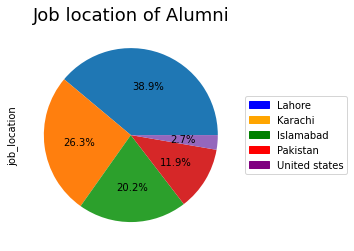

In [618]:
pie = df['job_location'].value_counts().nlargest(5).plot(kind="pie", autopct='%1.1f%%', labels=None)
pie.set_title("Job location of Alumni", fontsize=18)

lahore = mpatches.Patch(color='blue', label='Lahore')
karachi = mpatches.Patch(color='orange', label='Karachi')
islamabad  = mpatches.Patch(color='green', label='Islamabad')
pakistan = mpatches.Patch(color='red', label='Pakistan')
unitedstates = mpatches.Patch(color='purple', label='United states')

plt.legend(handles=[lahore,karachi,islamabad,pakistan,unitedstates], loc='center left', bbox_to_anchor=(1, 0.5))

In [619]:
print('Training-set accuracy score: {0:.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.3506


In [578]:

  
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))



Training set score: 0.3506
Test set score: 0.2571


In [579]:


# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=10)


# fit the model
clf_en.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=10)

In [580]:
y_pred_en = clf_en.predict(X_test)

In [581]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.3338


In [582]:
y_pred_train_en = clf_en.predict(X_train)

print(y_pred_train_en)

['lahore' 'lahore' 'lahore' ... 'lahore' 'lahore' 'lahore']


In [526]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.3940


In [530]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.3940
Test set score: 0.3338
